In [1]:
import os
import pandas as pd
## Import relevant libraries
import sys
import glob

sys.path.append('../../py_files/')
import quadrop as qd

# qd.set_plotting_style()


def concatenate_merged_expression_piv(data_paths, output_save_folder=None):
    """
    Concatenate the merged_expression_PIV.csv files from multiple data paths into one file.

    Parameters:
    - data_paths: List of paths where the merged_expression_PIV.csv files are located.
    - output_folder: Folder where the merged_expression_PIV.csv files are stored.
    - merged_file_name: Name of the merged expression PIV file to read.
    - output_file_name: Name of the output concatenated file to save.
    - output_save_folder: Folder where the concatenated file will be saved. If None, save in the first data path's output folder.
    
    The concatenated file will be saved in the specified `output_save_folder`, or the first path in `data_paths` if not provided.
    """
    
    output_folder="output_data"
    merged_file_name="merged_expression_PIV.csv"
    output_file_name="merged_expression_PIV.csv"
    
    # List to store DataFrames from each path
    dataframes = []

    # Loop over each data path
    for path in data_paths:
        merged_file_path = os.path.join(path, output_folder, merged_file_name)
        
        # Check if the merged file exists
        if os.path.exists(merged_file_path):
            # Read the merged_expression_PIV.csv file
            df = pd.read_csv(merged_file_path)
            dataframes.append(df)
            print(f"Loaded data from: {merged_file_path}")
        else:
            print(f"File not found: {merged_file_path}")

    if not dataframes:
        print("No valid files found to concatenate.")
        return

    # Concatenate all DataFrames
    concatenated_df = pd.concat(dataframes, ignore_index=True)

    # Determine the output directory
    if output_save_folder is None:
        output_save_folder = os.path.join(data_paths[0], output_folder)
    
    os.makedirs(output_save_folder, exist_ok=True)  # Ensure the output directory exists
    
    # Save the concatenated DataFrame to the output directory
    output_file_path = os.path.join(output_save_folder, output_folder, output_file_name)
    concatenated_df.to_csv(output_file_path, index=False)

    conditions = list(concatenated_df['condition'].unique())
    columns = list(concatenated_df.columns)

    print(f"Concatenated DataFrame saved to: {output_file_path}")

    return conditions, columns
    


chimeras_RT = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/090124-chimeras100nM-RT/2p5ul_TMBmix-1ulDNA100nM_/"
chimeras_29C = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/090124-chimeras100nM-29C/2p5ul_TMBmix-1ulDNA100nM_"
burst = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/090824-burstMotors-RT_29C/2p5TMB-1ulDNA100nM9kif3-heal-neg-nagr_4/"
sustained_RT = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/091024-sustainedMotors-RT/2p5TMB-1ulDNA100nM_/"
sustained_29C = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/090824-sustainedMotors-29C/2p5TMB-1ulDNA100nM_2/"
 

output_save_folder = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/"

# Example usage of the function:
conditions, columns = concatenate_merged_expression_piv(
    data_paths=[chimeras_RT, chimeras_29C, burst, sustained_RT, sustained_29C],
    output_save_folder = output_save_folder
)


EmptyDataError: No columns to parse from file

In [ ]:
conditions

In [ ]:
columns

In [14]:
x_column = "time (h)"  # Example x-axis column
y_column = "Protein Concentration_nM"  # Example y-axis column

# x_column = "Protein Concentration_nM"  # Example y-axis column
# y_column = "velocity magnitude [m/s]_mean"  # Example y-axis column

# x_column = "time (h)"  # Example x-axis column
# y_column = "velocity magnitude [m/s]_mean"  # Example y-axis column

# x_column = "time (h)"  # Example x-axis column
# y_column = "power [W]_mean"  # Example y-axis column

# x_column = "time (h)"  # Example x-axis column
# y_column = "work [J]_mean"  # Example y-axis column

# x_column = "time (h)"  # Example x-axis column
# y_column = "distance [m]_mean"  # Example y-axis column

output_save_folder = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/"


qd.plot_expression_piv(
    output_save_folder,
    ["A-RT", "A-29C",],
    x_column, 
    y_column, 
    sigma_x=0.1, 
    sigma_y=10, 
    x_log=False, 
    y_log=False, 
    min_frame=0, 
    max_frame=None, 
    individual_plots=False
    )

Combined plot saved at ../../../../Thomson Lab Dropbox/David Larios/activedrops/main/all/output_data/expression_piv_plots/time_(h)_vs_Protein_Concentration_nM_All_Conditions.png


2024-09-16 23:21:15,297 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data available for condition: B-RT
No data available for condition: B-29C


UnboundLocalError: cannot access local variable 'sanitized_x_column' where it is not associated with a value

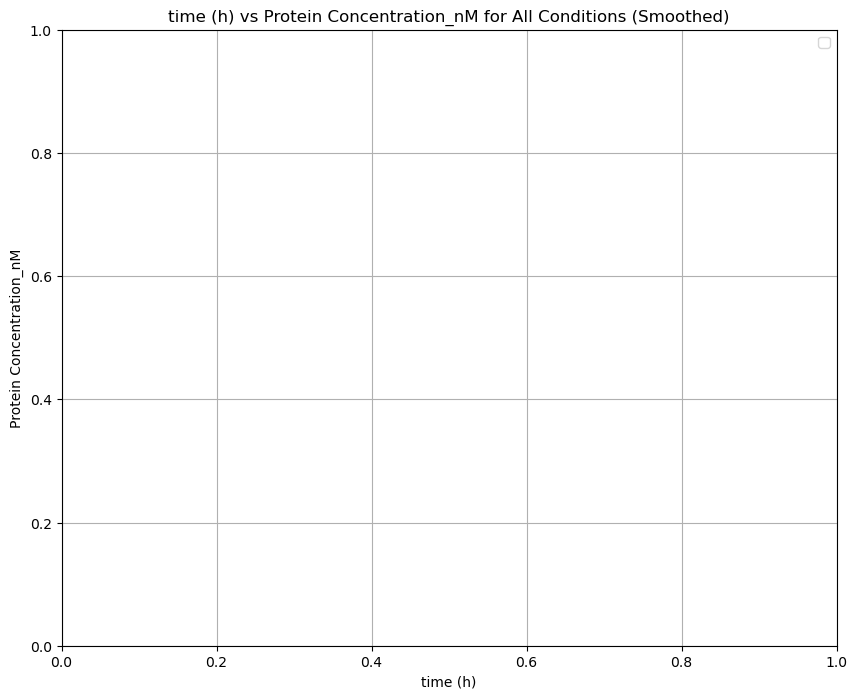

In [33]:
y_columns = [
    "Protein Concentration_nM", 
    "velocity magnitude [m/s]_mean", 
    "distance [m]_mean",
    "Rate of Change of Protein Molecules per Second",
    "Translation Rate aa_s",
    "correlation length [m]_mean"
    ]

for y_column in y_columns:
    qd.plot_expression_piv(
        output_save_folder,
        ["H-RT", "H-29C",],
        x_column, 
        y_column, 
        sigma_x=0.1, 
        sigma_y=10, 
        x_log=False, 
        y_log=False, 
        min_frame=0, 
        max_frame=None, 
        individual_plots=False
        )
    

y_columns = [
    "power [W]_mean", 
    "work [J]_mean", 
    # "Number of Protein Molecules",
    ]

for y_column in y_columns:
    qd.plot_expression_piv(
        output_save_folder,
        ["H-RT", "H-29C",],
        x_column, 
        y_column, 
        sigma_x=0.1, 
        sigma_y=10, 
        x_log=False, 
        y_log=True, 
        min_frame=0, 
        max_frame=None, 
        individual_plots=False
        )

In [ ]:

# List of features for PCA
features_pca = [
    "vorticity [1/s]_mean",
    # "velocity magnitude [m/s]_mean",
    # "distance [m]_mean",
    "divergence [1/s]_mean",
    "shear [1/s]_mean",
    "strain [1/s]_mean",
    # "correlation length [m]_mean", 
    "power [W]_mean",
    # "work [J]_mean",
    'vector direction [degrees]_mean',
    "Protein Concentration_nM", 
]

# Run PCA and save plot (with all conditions and subconditions in the same plot)
qd.plot_pca_expression_piv(output_save_folder, conditions=conditions, subconditions=['Rep1'], features=features_pca, sigma=1)
